## Density
    V. How do you calculate the integral of a function on the grid? Normalize the states so they integrate to 1

    VI. Calculate and plot the electron density for 6 electrons in the harmonic potential. Verify that the density integrates to 6 electrons.

Inorder to include both Coulomb or Hartree interaction as well as LDA exchange, both of which are density functionals, we need to calculate the electron density. If $\psi(x)$ is the wavefunction, then the normalisation condition is given by, 

$$\int |\psi(x)|^2 dx = 1$$

The electron density in DFT is given by,

$$n(x) = \sum_n f_n|\psi(x)|^2$$

Where, $f_n$ are the occupation numbers. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.integrate import simps

In [2]:
def D(x, N=100):
    '''
    Returns the operator form of first-derivative

            Parameters:
                    x (array): grid of 1D array
                    N (int): number of points on the grid

            Returns:
                    D (array): first-derivative operator
    '''
    h = x[1] - x[0]
    k = [np.ones(N-1), -np.ones(N-1)]
    offset = [1, -1]
    D = diags(k, offset).toarray()
    D = D/(2 * h)
    # # Boundary values where it is not well defined
    D[0, 0] = 0
    D[0, 1] = 0
    D[1, 0] = 0
    D[N-1, N-2] = 0
    D[N-2, N-1] = 0
    D[N-1, N-1] = 0
    return D


def D2(x, N=100):
    '''
    Returns the operator form of second-derivative

            Parameters:
                    x (array): grid of 1D array
                    N (int): number of points on the grid

            Returns:
                    D (array): first-derivative operator
    '''
    h = x[1] - x[0]
    k1 = [np.ones(N-1), -2*np.ones(N), np.ones(N-1)]
    offset = [-1, 0, 1]
    D2 = diags(k1, offset).toarray()
    D2 = D2/(h ** 2)
    # Boundary values where it is not well defined
    D2[0, 0] = 0
    D2[0, 1] = 0
    D2[1, 0] = 0
    D2[N-1, N-2] = 0
    D2[N-2, N-1] = 0
    D2[N-1, N-1] = 0
    return D2


def normalise_psi(psi, x):
    '''
    Normalises the given wavefunction

            Parameters:
                    psi (array): wavefunction psi
                    x (array): 1D grid of array

            Returns:
                    normalised psi
    '''
    int_psi_square = simps(abs(psi) ** 2, x)
    return psi/np.sqrt(int_psi_square)


def get_occupation_num(nElectron, maxElectron=2):
    '''
    Returns a list of occupation numbers for a given number of electrons

            Parameters:
                    nElectron (int): number of electrons
                    maxElectron (int): max number of allowed elecrons in one state

            Returns:
                    fn (array): occupation number
    '''
    nFloor = np.floor_divide(nElectron, 2)
    fn = maxElectron * np.ones(nFloor)
    if nElectron % 2:
        fn = np.append(fn, 1)
    return fn


def get_density(nElectron, psi, x):
    '''
    Returns electron density for a given number of electrona and wavefunction

            Parameters:
                    nElectron (int): number of electrons
                    psi (array): wavefunction
                    x (array): 1D grid of array

            Returns:
                    eDensity (array): electron density
    '''
    psiNorm = normalise_psi(psi, x)  # Normalisation
    fn = get_occupation_num(nElectron)
    eDensity = np.zeros(N)
    for f_n, psi in zip(fn, psiNorm.T):
        eDensity += f_n * (psi ** 2)
    return eDensity


def integrate(x, y):
    '''
    Returns the integration by simpson's method

            Parameters:
                    x (array): 1D grid of arra
                    y (array): integrand

            Returns:
                    result (float): result of the integration
    '''
    result = simps(y, x)
    return result

In [3]:
L = 5
N = 200
x = np.linspace(-L, L, N)
X = np.diagflat(x*x)
H = -D2(x, N)/2 + X
E, V = np.linalg.eigh(H)
psi = V
nElectron = 6

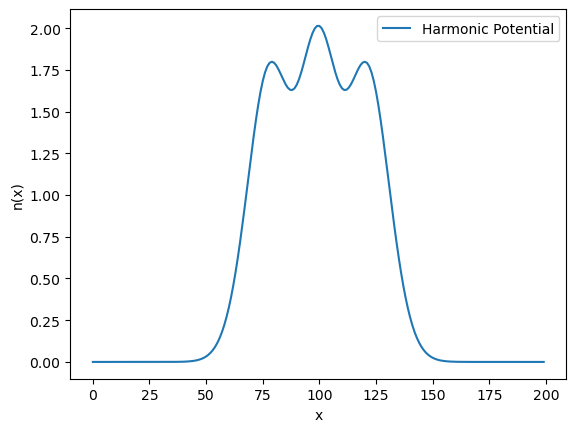

In [4]:
density = get_density(nElectron, psi, x)
plt.plot(density, label="Harmonic Potential")
plt.xlabel("x")
plt.ylabel("n(x)")
plt.legend()
plt.show()

In [5]:
#  Verify that the density integrates to n electrons.
integrate(x, density)

6.005378396499321